<h2 style='color:blue' align='center'>Data Augmentation To Address Overfitting In Flower Classification CNN</h2>

**In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc**

Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In below image, 4 new training samples are generated from original sample using different transformations

<img src="daisy2.JPG" />

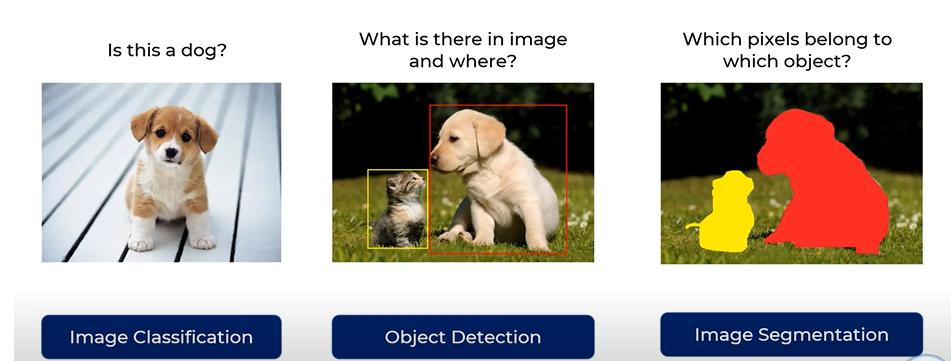

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

<h3 style='color:purple'>Load flowers dataset</h3>

In [5]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True) #untar unzip the file
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 43s 0us/step


In [6]:
data_dir

'.\\datasets\\flower_photos'

In [8]:
import pathlib #Help in image to work with numpy
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [9]:
list(data_dir.glob('*/*.jpg'))[:5] #glob help to get all the image with jpg format

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [10]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count) #Total number of image

3670


In [11]:
roses = list(data_dir.glob('roses/*')) #list of all the rose image
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

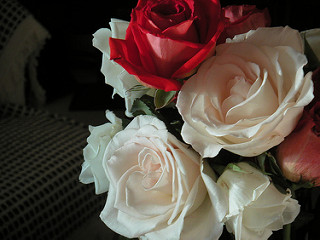

In [12]:
PIL.Image.open(str(roses[1]))

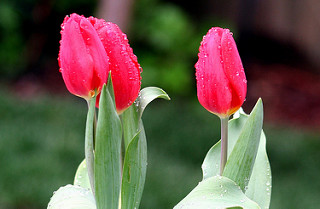

In [13]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

In [14]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [15]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [16]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [17]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [18]:
#OpenCV help to read image into openCV object (similar to numpy array)
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [19]:
img.shape

(240, 179, 3)

In [21]:
#Becoz all the dimage dimension are not same, so resize all the image
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [22]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [23]:
X = np.array(X) #3D image (RGB)
y = np.array(y)

In [24]:
X

array([[[[  1,  16,   7],
         [  1,  16,   7],
         [  1,  17,   9],
         ...,
         [ 23,  50,  31],
         [ 25,  51,  32],
         [ 26,  52,  33]],

        [[ 10,  23,  15],
         [ 10,  23,  15],
         [  9,  22,  14],
         ...,
         [ 20,  44,  30],
         [ 23,  47,  33],
         [ 26,  50,  36]],

        [[ 13,  20,  13],
         [ 12,  20,  13],
         [ 11,  19,  12],
         ...,
         [ 21,  43,  30],
         [ 22,  45,  31],
         [ 25,  48,  34]],

        ...,

        [[ 12,  24,  18],
         [ 11,  22,  15],
         [ 12,  21,  11],
         ...,
         [  7,  14,   7],
         [  2,   8,   2],
         [  0,   2,   0]],

        [[ 19,  30,  28],
         [ 16,  26,  21],
         [ 14,  22,  15],
         ...,
         [  3,  12,   2],
         [  0,   8,   1],
         [  0,   6,   1]],

        [[ 11,  21,  20],
         [ 17,  25,  24],
         [ 21,  28,  23],
         ...,
         [  1,  12,   2],
        

In [25]:
y

array([0, 0, 0, ..., 4, 4, 4])

<h3 style='color:purple'>Train test split</h3>

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<h3 style='color:purple'>Preprocessing: scale images</h3>

In [27]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<h3 style='color:purple'>Build convolutional neural network and train it</h3>

In [29]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'), #16 mean 16 filter each of size 3X3
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'), #32 mean 16 filter each of size 3X3
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'), #64 mean 16 filter each of size 3X3
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),  #dense accept 1D arrary, here we have 2D arrary so need to flatten
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)              

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 238ms/step - accuracy: 0.2988 - loss: 1.6371
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 284ms/step - accuracy: 0.6056 - loss: 1.0242
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 279ms/step - accuracy: 0.6951 - loss: 0.7889
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 332ms/step - accuracy: 0.8067 - loss: 0.5289
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 38s 288ms/step - accuracy: 0.8719 - loss: 0.3605
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 329ms/step - accuracy: 0.9313 - loss: 0.2156
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 279ms/step - accuracy: 0.9706 - loss: 0.1050
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 348ms/step - accuracy: 0.9733 - loss: 0.0981
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 239ms/step - accuracy: 0.9804 - loss: 0.0793
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 259ms/step - accuracy: 0.9842 - loss: 0.0559
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 258ms/step - accuracy: 0.9945 - loss: 0.0229
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 27

In [30]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.6436 - loss: 2.9621


[2.9071028232574463, 0.6546840667724609]

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [31]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step


array([[  9.660718 ,  33.893436 ,   1.0648794, -21.411573 ,  -7.5117917],
       [  7.98504  ,  -0.2228702,  -4.7956486,  -4.1245446,   6.1117754],
       [  3.9980066,  -0.6044544,  23.668402 , -13.163256 ,  -1.2572076],
       ...,
       [ -1.0068995,  -9.863483 ,  -5.502077 ,  11.728771 ,  12.951354 ],
       [  4.667351 ,  14.769435 ,  -3.6695535,  -7.897245 ,  -6.1227055],
       [  2.261168 , -18.170856 ,  -2.4078782,  11.956232 ,   7.66386  ]],
      dtype=float32)

In [32]:
score = tf.nn.softmax(predictions[0]) #Softmax convert to probabilty score
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.9913256e-11, 1.0000000e+00, 5.5301803e-15, 9.5794427e-25,
       1.0421690e-18], dtype=float32)>

In [33]:
np.argmax(score)

1

In [34]:
y_test[0]

1

<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

In [38]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
# layers.RandomContrast(0.1),
])

In [41]:
# data_augmentation = tf.keras.Sequential(
#   [
#     layers.experimental.preprocessing.RandomFlip("horizontal", 
#                                                  input_shape=(img_height, 
#                                                               img_width,
#                                                               3)),
#     layers.experimental.preprocessing.RandomRotation(0.1),
#     layers.experimental.preprocessing.RandomZoom(0.1),
#   ]
# )

**Original Image**

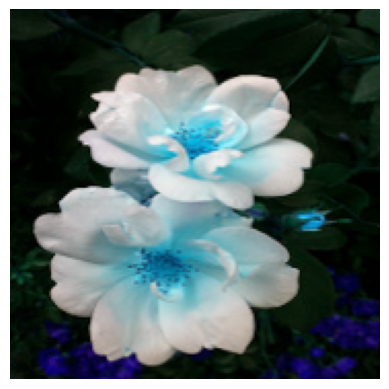

In [39]:
plt.axis('off')
plt.imshow(X[0])

**Newly generated training sample using data augmentation**

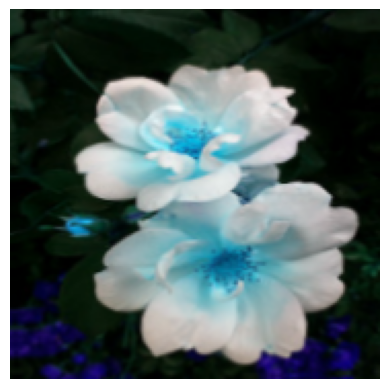

In [40]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

<h3 style='color:purple'>Train the model using data augmentation and a drop out layer</h3>

In [42]:
num_classes = 5

model = Sequential([
  data_augmentation, #use data_augumentaion as 1st layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2), #drop 20% of layer
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 342ms/step - accuracy: 0.2692 - loss: 1.6060
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 330ms/step - accuracy: 0.5283 - loss: 1.1490
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 336ms/step - accuracy: 0.5845 - loss: 1.0221
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 55s 497ms/step - accuracy: 0.6232 - loss: 0.9630
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 38s 435ms/step - accuracy: 0.6332 - loss: 0.9412
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 385ms/step - accuracy: 0.6849 - loss: 0.8139
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 39s 354ms/step - accuracy: 0.6886 - loss: 0.8039
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 379ms/step - accuracy: 0.7095 - loss: 0.7747
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 36s 422ms/step - accuracy: 0.6922 - loss: 0.7754
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 372ms/step - accuracy: 0.7109 - loss: 0.7532
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 352ms/step - accuracy: 0.7276 - loss: 0.7179
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 31

In [43]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7613 - loss: 0.7158


[0.7736523747444153, 0.741830050945282]

**You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%**